# ASSIGNMENT ON FMST.

## 1. Importing all Necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data of concrete from .csv file. 

In [2]:
#reading the CSV file into pandas dataframe
df=pd.read_csv('F:\Python\Assignment 5\concrete.csv')

In [3]:
#Check the dataset.
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.

## 3. Exploratory data analysis.

### 1. Univariate analysis.

In [4]:
#To show the detailed summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


* It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.

In [5]:
# Data types information
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

* It gives the data types of each column of the dataset.

In [6]:
#To get the shape 
df.shape

(1030, 9)

* It gives the details of the number of rows and columns present in the dataset.There are 1030 rows and 9 columns.

In [7]:
#To get the columns name
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

* It gives the column names of the dataset.

In [8]:
#Analyze the distribution of the dataset
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


* It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
* We can see that cement,slag,ash are left skewed.

### Description of independent attributes, Quartiles and using IQR to find outliers and applying necessary step to eliminate them.

### Cement.

In [9]:
print('Range of values: ', df['cement'].max()-df['cement'].min())

Range of values:  438.0


In [10]:
print('Minimum age: ', df['cement'].min())
print('Maximum age: ',df['cement'].max())
print('Mean value: ', df['cement'].mean())
print('Median value: ',df['cement'].median())
print('Standard deviation: ', df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [11]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [12]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [13]:
print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


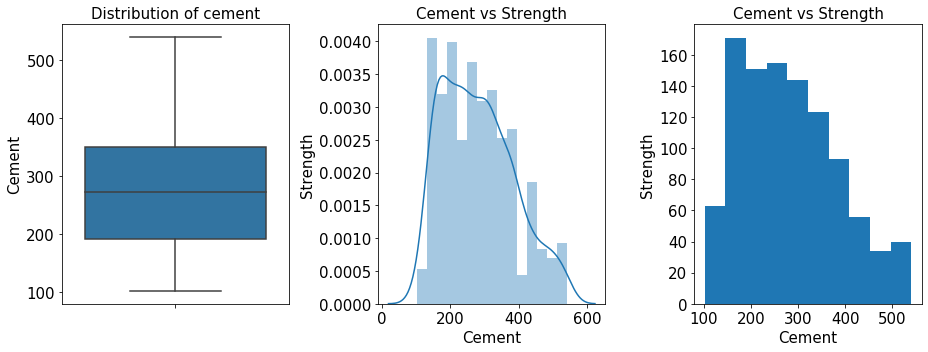

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Slag

In [15]:
print('Range of values: ', df['slag'].max()-df['slag'].min())

Range of values:  359.4


In [16]:
print('Minimum slag: ', df['slag'].min())
print('Maximum slag: ',df['slag'].max())
print('Mean value: ', df['slag'].mean())
print('Median value: ',df['slag'].median())
print('Standard deviation: ', df['slag'].std())
print('Null values: ',df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [17]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [18]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [19]:
print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(df[df['slag']>357.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['slag']<-214.425]['slag'].count()*100/len(df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


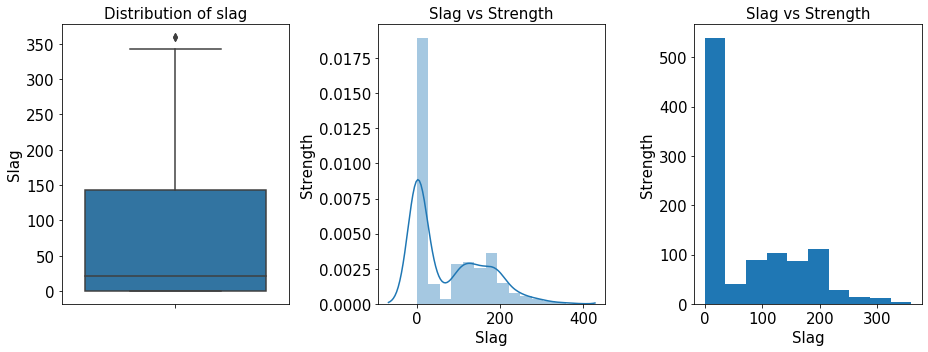

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Ash

In [21]:
print('Range of values: ', df['ash'].max()-df['ash'].min())

Range of values:  200.1


In [22]:
print('Minimum ash: ', df['ash'].min())
print('Maximum ash: ',df['ash'].max())
print('Mean value: ', df['ash'].mean())
print('Median value: ',df['ash'].median())
print('Standard deviation: ', df['ash'].std())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794


In [23]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [24]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [25]:
print('Number of outliers in ash upper : ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', df[df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(df[df['ash']>295.75]['ash'].count()*100/len(df)), '%')
print('% of Outlier in ash lower: ',round(df[df['ash']<-177.45]['ash'].count()*100/len(df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


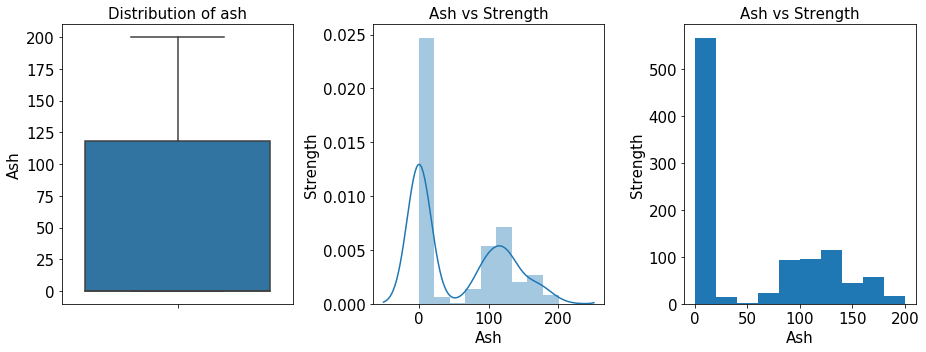

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Water

In [27]:
print('Range of values: ', df['water'].max()-df['water'].min())

Range of values:  125.2


In [28]:
print('Minimum water: ', df['water'].min())
print('Maximum water: ',df['water'].max())
print('Mean value: ', df['water'].mean())
print('Median value: ',df['water'].median())
print('Standard deviation: ', df['water'].std())
print('Null values: ',df['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False


In [29]:
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [30]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [31]:
print('Number of outliers in water upper : ', df[df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>232.65]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<124.25]['water'].count()*100/len(df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


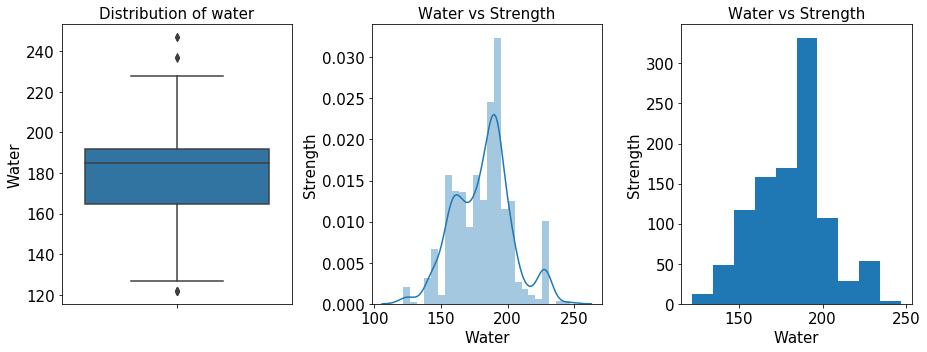

In [32]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Superplastic

In [33]:
print('Range of values: ', df['superplastic'].max()-df['superplastic'].min())

Range of values:  32.2


In [34]:
print('Minimum superplastic: ', df['superplastic'].min())
print('Maximum superplastic: ',df['superplastic'].max())
print('Mean value: ', df['superplastic'].mean())
print('Median value: ',df['superplastic'].median())
print('Standard deviation: ', df['superplastic'].std())
print('Null values: ',df['superplastic'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False


In [35]:
Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [36]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [37]:
print('Number of outliers in superplastic upper : ', df[df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', df[df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(df[df['superplastic']>25.5]['superplastic'].count()*100/len(df)), '%')
print('% of Outlier in superplastic lower: ',round(df[df['superplastic']<-15.3]['superplastic'].count()*100/len(df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


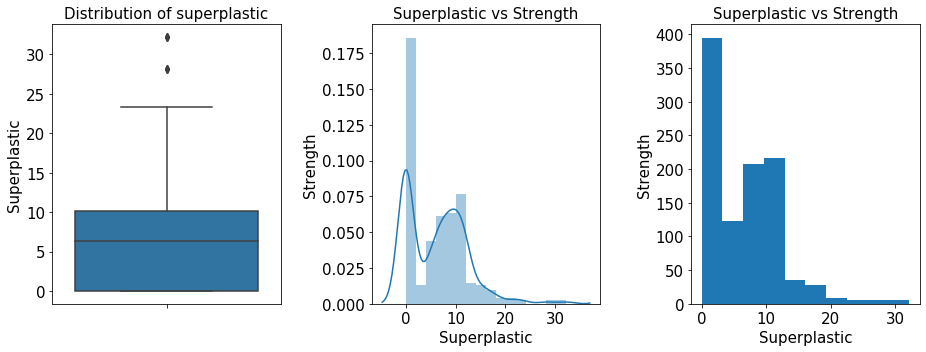

In [38]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Coarseagg

In [39]:
print('Range of values: ', df['coarseagg'].max()-df['coarseagg'].min())

Range of values:  344.0


In [40]:
print('Minimum value: ', df['coarseagg'].min())
print('Maximum value: ',df['coarseagg'].max())
print('Mean value: ', df['coarseagg'].mean())
print('Median value: ',df['coarseagg'].median())
print('Standard deviation: ', df['coarseagg'].std())
print('Null values: ',df['coarseagg'].isnull().any())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False


In [41]:
Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [42]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [43]:
print('Number of outliers in coarseagg upper : ', df[df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseagg']>1175.5]['coarseagg'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseagg']<785.9]['coarseagg'].count()*100/len(df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


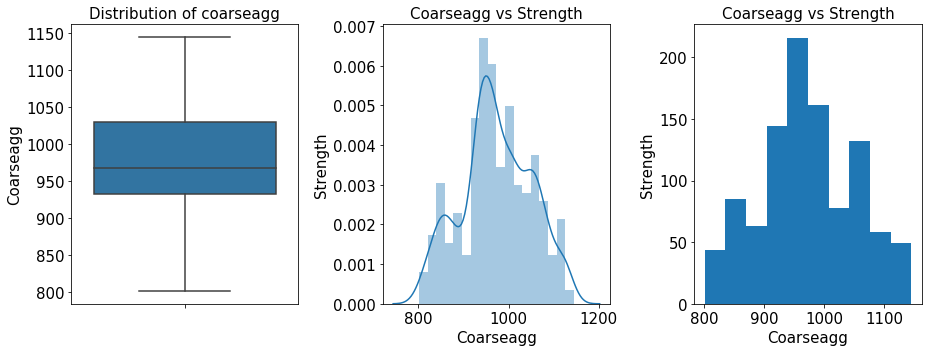

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Fineagg

In [45]:
print('Range of values: ', df['fineagg'].max()-df['fineagg'].min())

Range of values:  398.6


In [46]:
print('Minimum value: ', df['fineagg'].min())
print('Maximum value: ',df['fineagg'].max())
print('Mean value: ', df['fineagg'].mean())
print('Median value: ',df['fineagg'].median())
print('Standard deviation: ', df['fineagg'].std())
print('Null values: ',df['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False


In [47]:
Q1=df['fineagg'].quantile(q=0.25)
Q3=df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [48]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [49]:
print('Number of outliers in fineagg upper : ', df[df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', df[df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(df[df['fineagg']>963.575]['fineagg'].count()*100/len(df)), '%')
print('% of Outlier in fineagg lower: ',round(df[df['fineagg']<591.37]['fineagg'].count()*100/len(df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


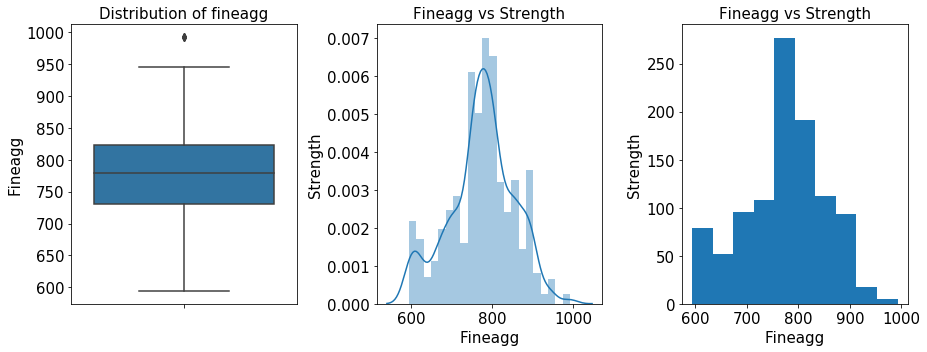

In [50]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Age

In [51]:
print('Range of values: ', df['age'].max()-df['age'].min())

Range of values:  364


In [52]:
print('Minimum age: ', df['age'].min())
print('Maximum age: ',df['age'].max())
print('Mean value: ', df['age'].mean())
print('Median value: ',df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


In [53]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [54]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [55]:
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


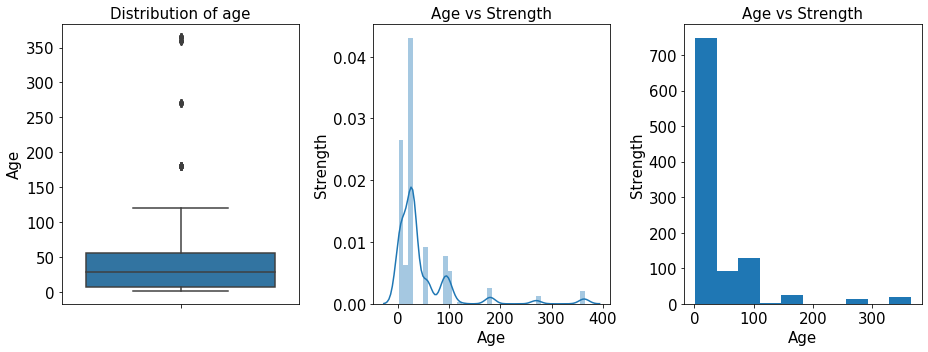

In [56]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## 2. Multivariate Analysis

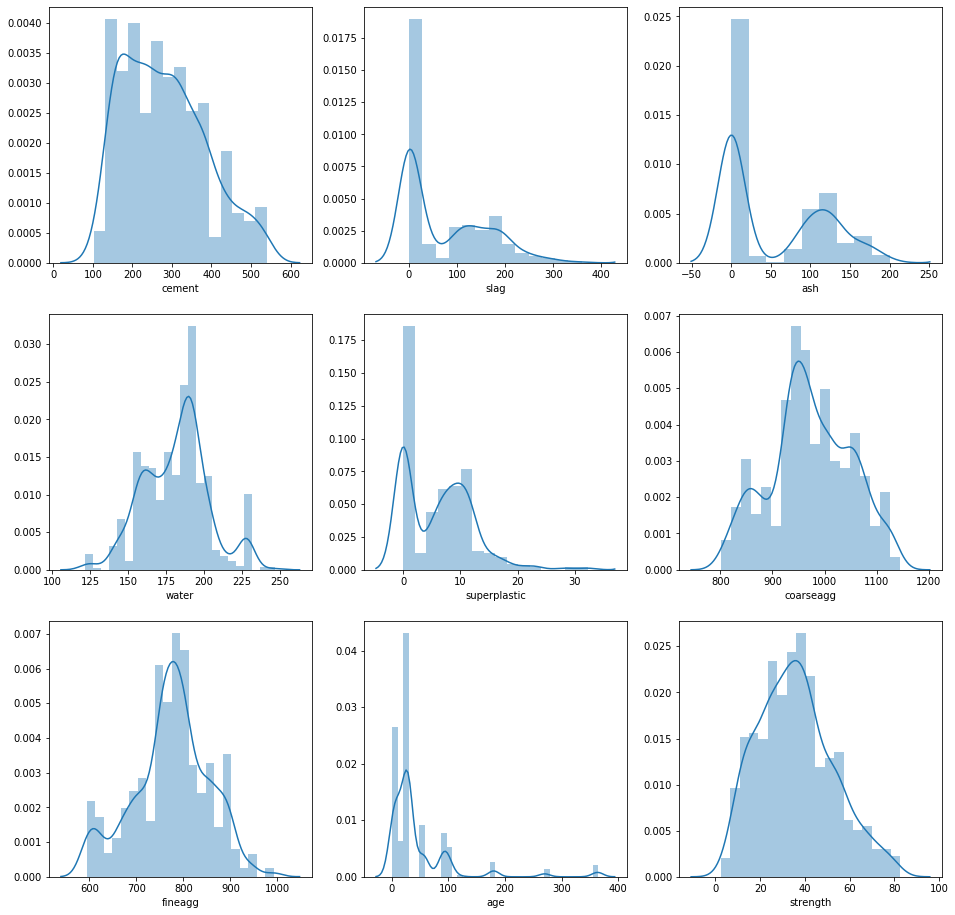

In [57]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])
plt.show()

 We can see observe that :
- cement is almost normal. 
- slag has  three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

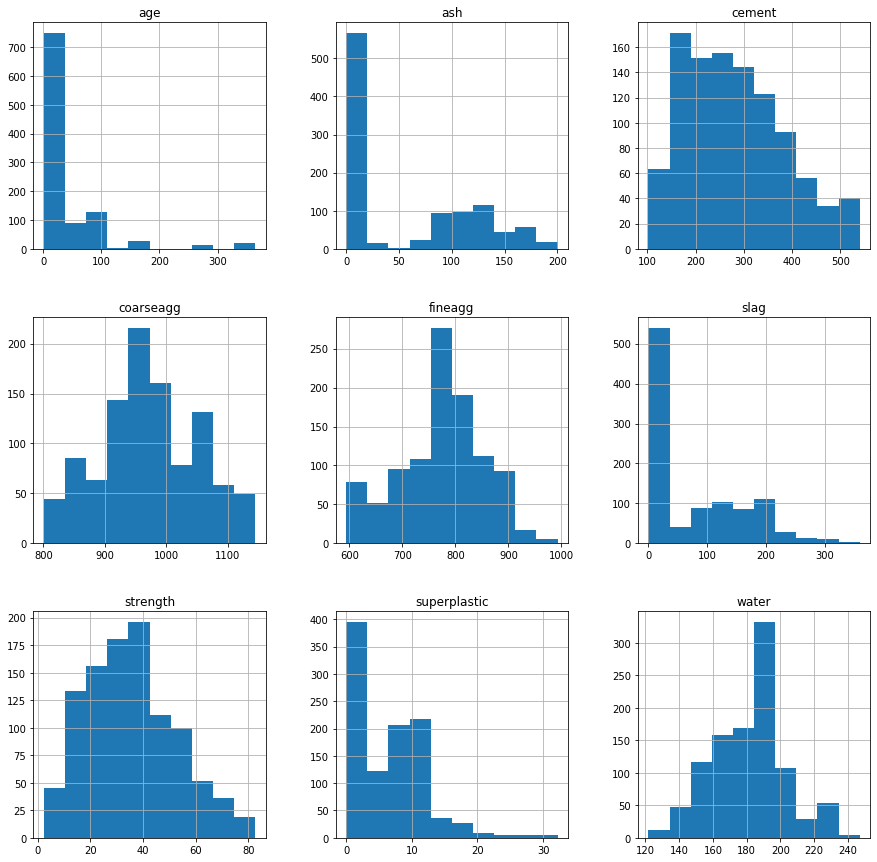

In [58]:
# Histogram 
df.hist(figsize=(15,15))
plt.show()

* It is also giving the same information like distance plot.

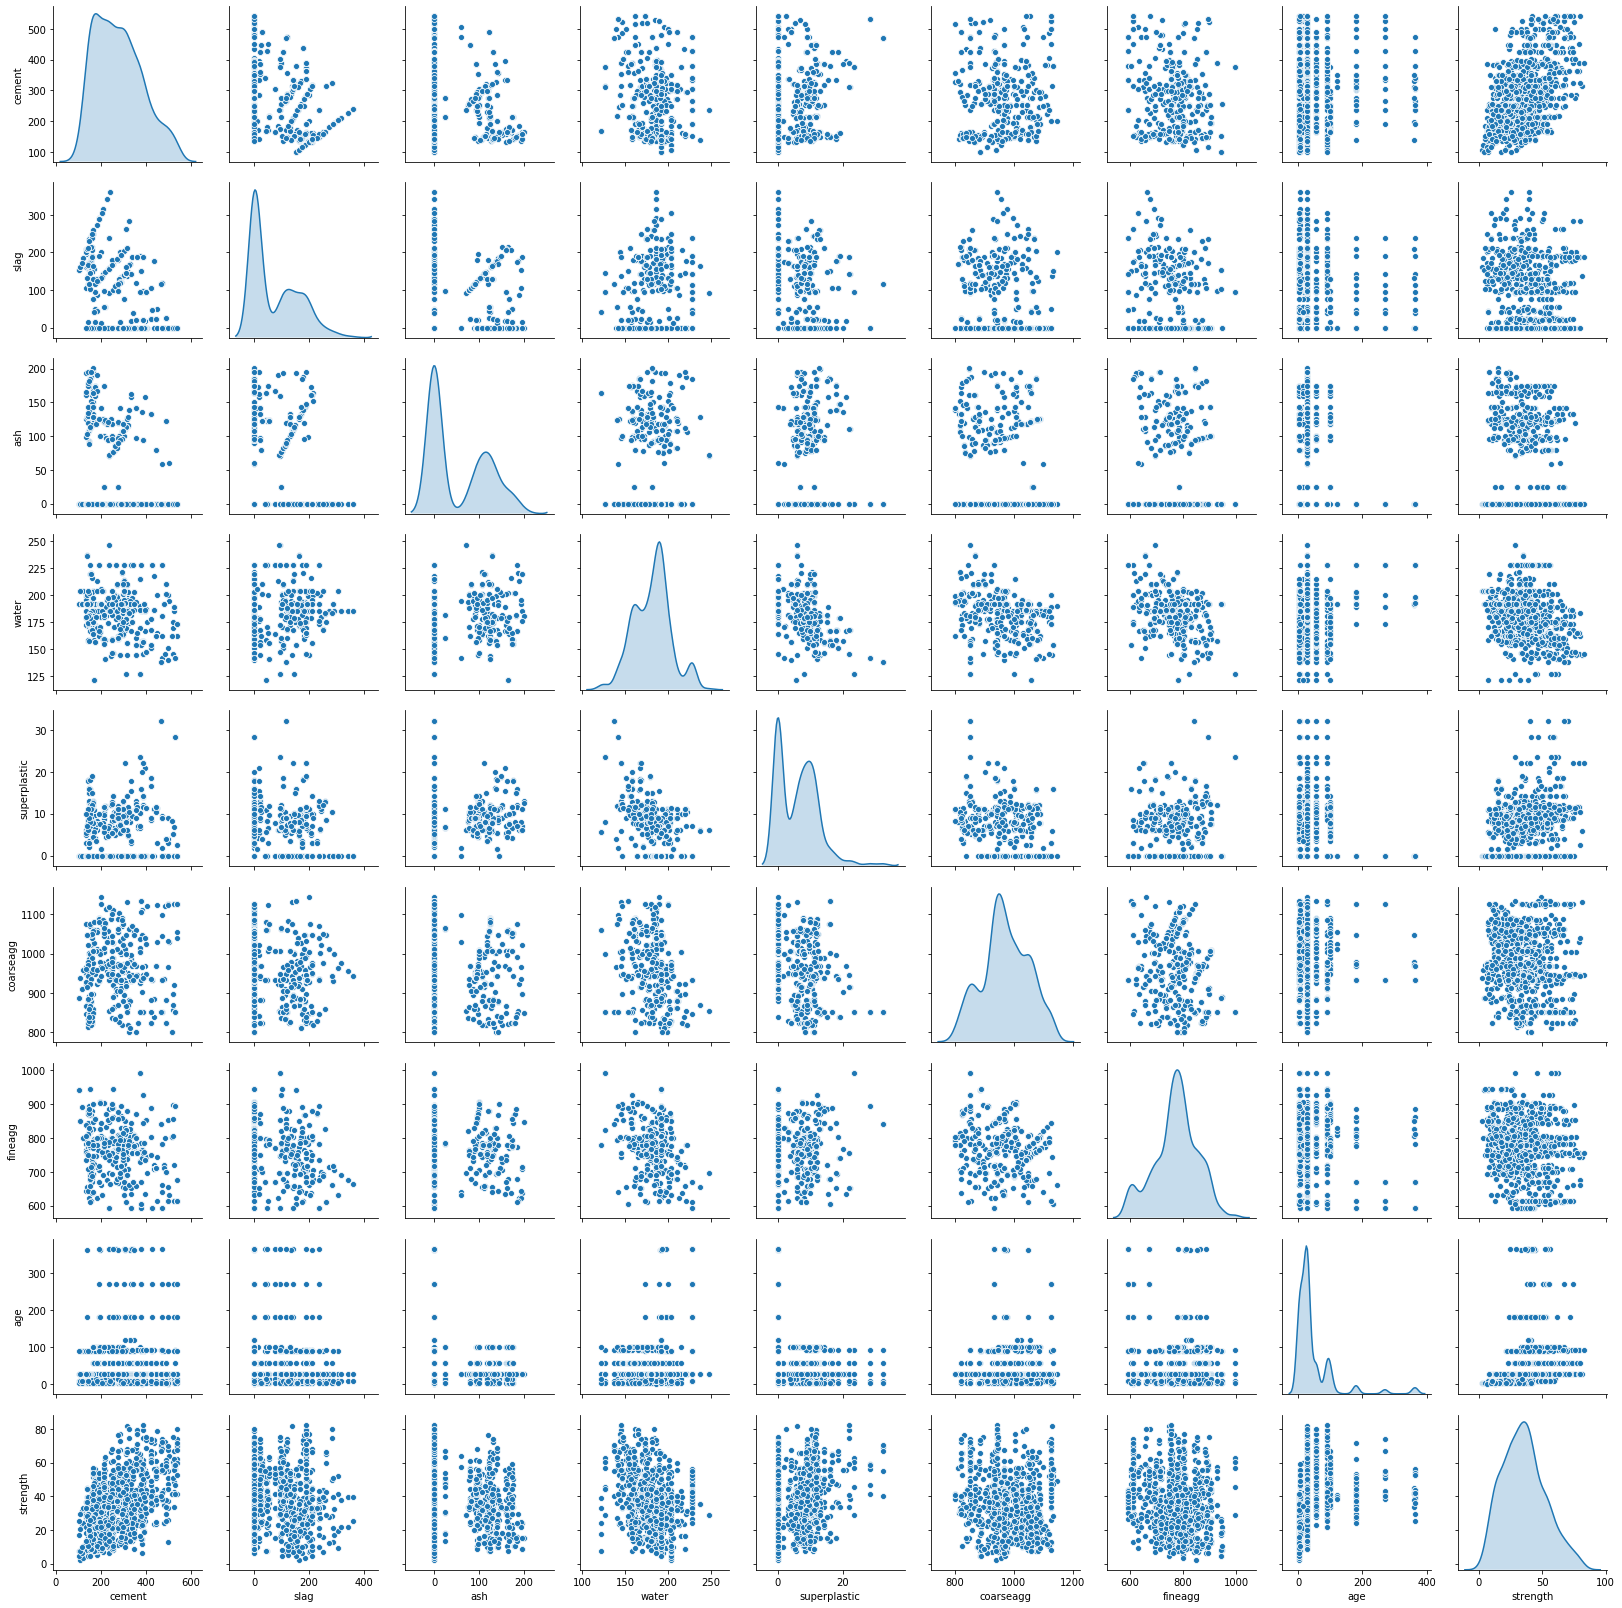

In [59]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df, diag_kind='kde')  
plt.show()

#### Diagonals Analysis
The diagonal gives the same information, we got using distplot.
* cement attribute have almost normal curve.
* slag has  two gausssians and rightly skewed.It shows the presence of outlies.
* ash has two gaussians and rightly skewed.It shows the presence of outlies.
* water has atleast three guassians and slighly left skewed.It shows the presence of outlies.
* superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
* coarseagg has three guassians and almost normal.
* fineagg has almost two guassians and looks like normal.
* age has multiple guassians and rightly skewed. It shows the presence of outlies.
* strength is close to a normal curve.

We not only have missing values problem but also outliers problem in the dataset.

#### Off Diagonal Analysis: Relationship between indpendent attributes
##### Scatter plots
- cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true  as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

#### strength attribute : Relationship between dependent and independent attributes
strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs slag: There is also no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [60]:
# corrlation matrix 
cor=df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


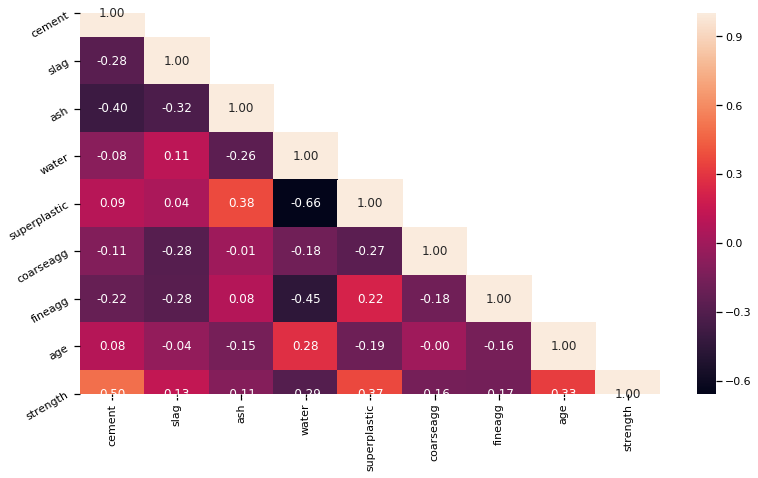

In [61]:
#heatmap
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* It is also giving the same information we observed in pairplot analysis. 
* water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.


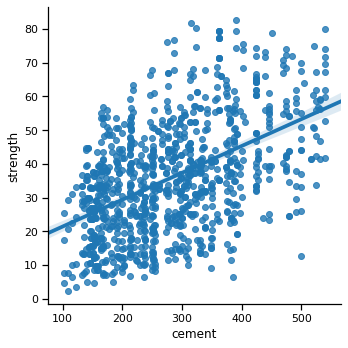

In [62]:
# Strength vs cement
#lm plot
sns.lmplot(x="cement",y="strength",data=df)
plt.show()

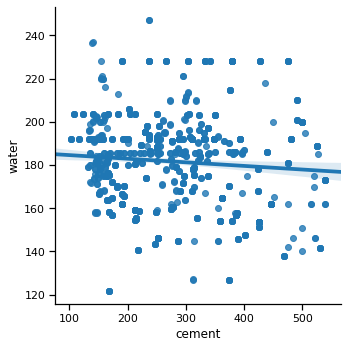

In [63]:
# water vs cement
#lm plot
sns.lmplot(x="cement",y="water",data=df)
plt.show()

## Checking for Missing Values and outliers again and eleminating them finally.

In [64]:
#Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

* We can see that there are no missing values.

In [65]:
#Creating copy of original dataset
df1=df.copy()

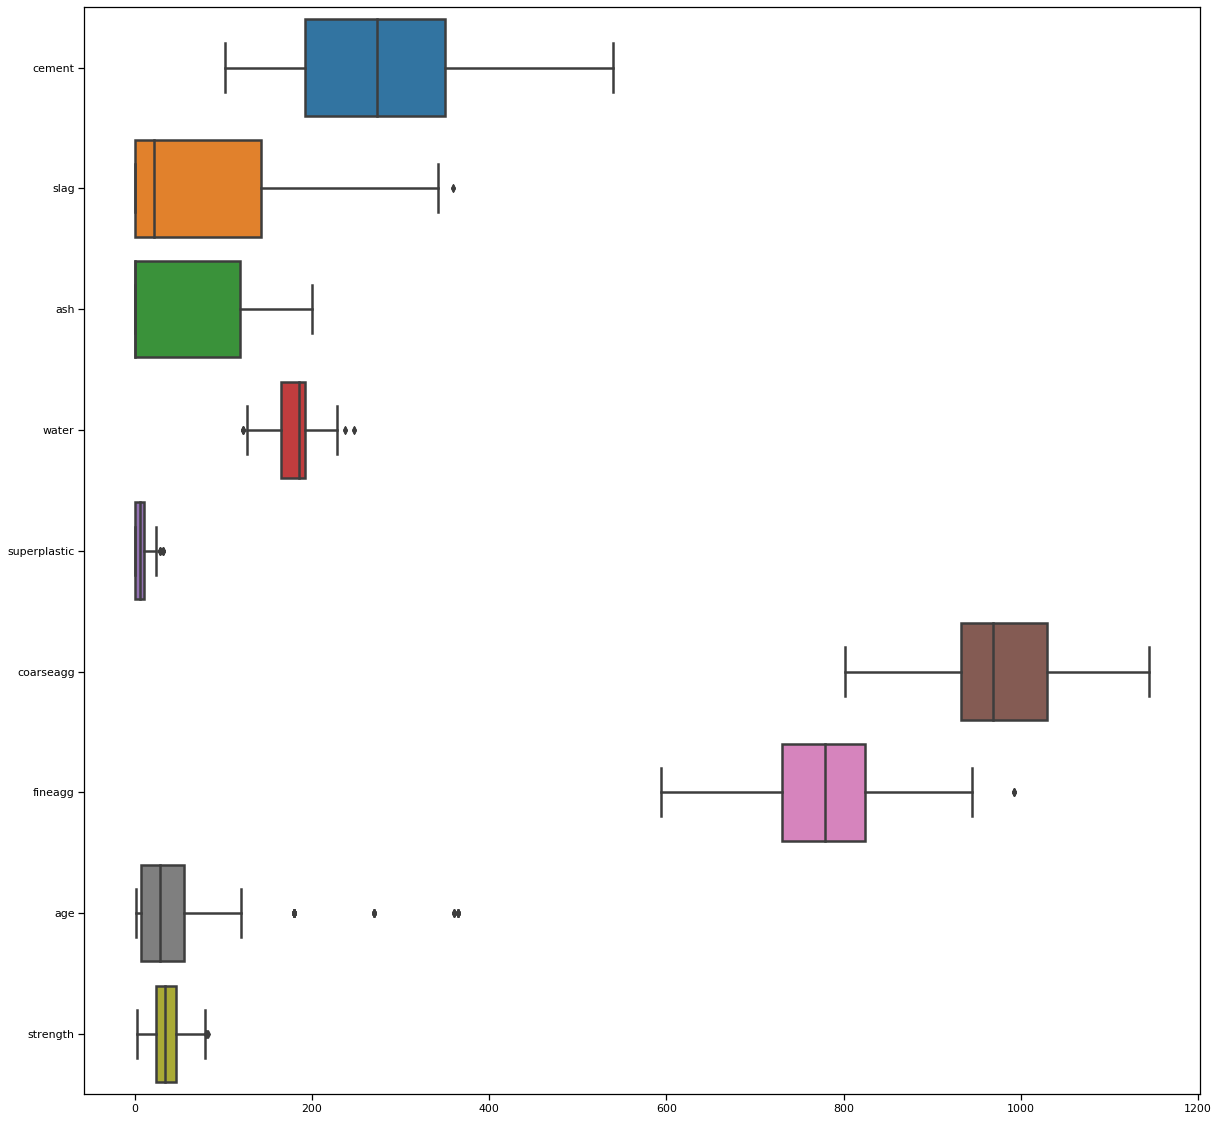

In [66]:
# again check for outliers in dataset after handling missing values using boxplot
#Summary View of all attribute to trace out outliers

plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df1, orient="h")

In [67]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',df1[((df1.cement - df1.cement.mean()) / df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',df1[((df1.ash - df1.ash.mean()) / df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',df1[((df1.water - df1.water.mean()) / df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',df1[((df1.superplastic - df1.superplastic.mean()) / df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',df1[((df1.coarseagg - df1.coarseagg.mean()) / df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',df1[((df1.fineagg - df1.fineagg.mean()) / df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


* Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
* We can see that slag, water, superplastic and age contain outliers.

In [68]:
#Replacing the outliers by median
for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

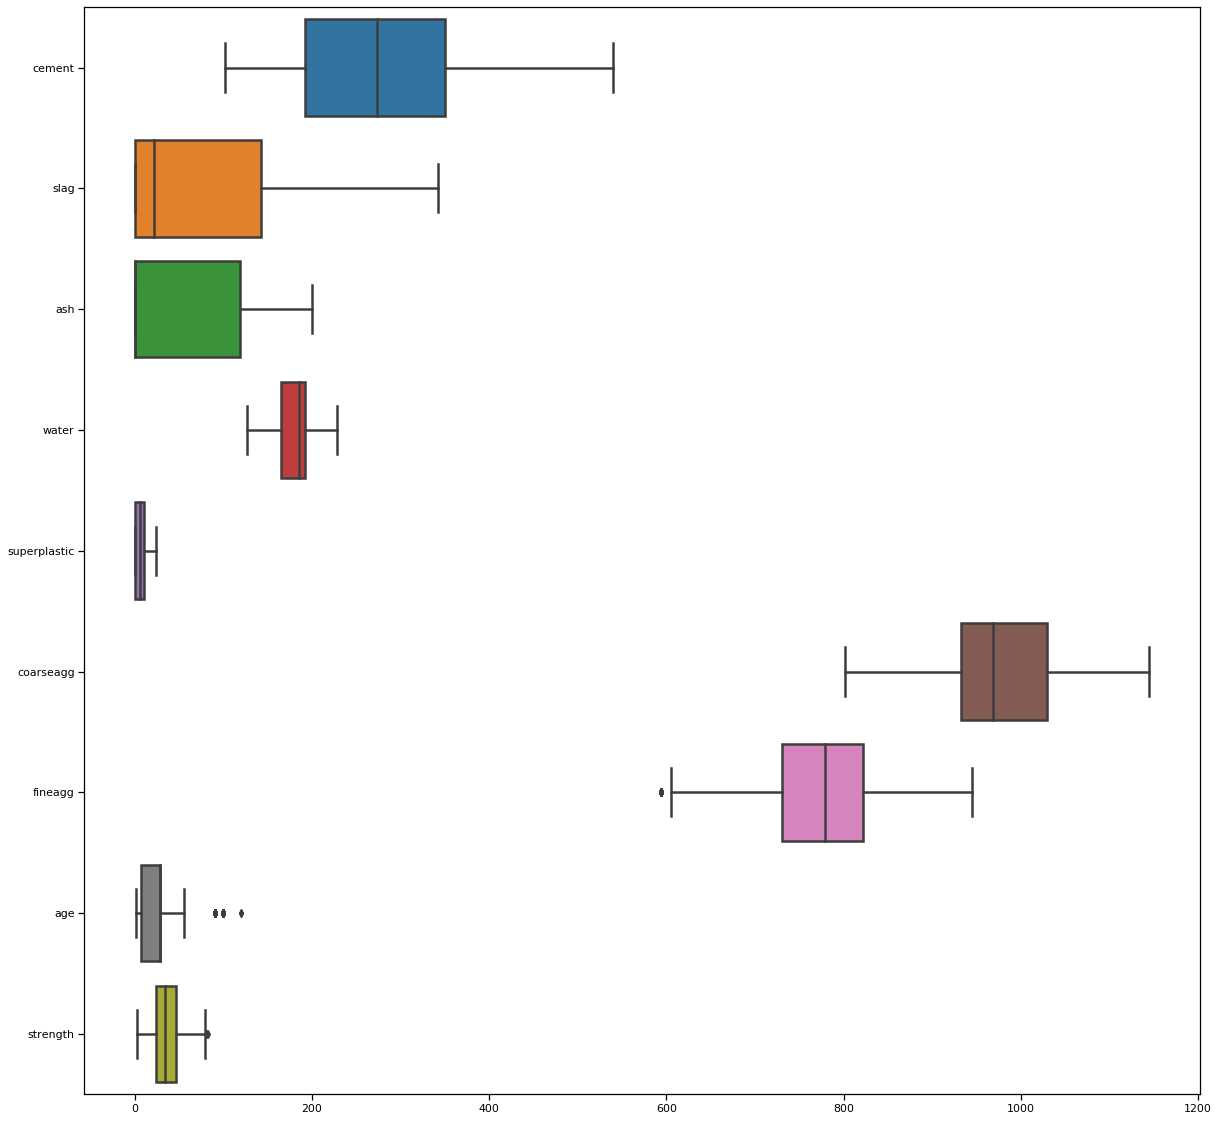

In [69]:
# again check for outliers in dataset using boxplot
#Summary View of all attribute to trace out outliers

plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df1, orient="h")

## 4. Feature Engineering, Model Building and Model Tuning

In [70]:
#Scaling the dataset
df_z = df1.apply(zscore)
df_z=pd.DataFrame(df_z,columns=df.columns)

* Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.

In [71]:
# Splitting the Data
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

### Applying various regression models on the dataframe.

#### 1. Decision Tree Regressor

In [72]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [73]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.351688
slag          0.095372
ash           0.011935
water         0.125272
superplastic  0.017945
coarseagg     0.035260
fineagg       0.033976
age           0.328553


* So, cement, age and water are significant attributes.
* Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [74]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.8454884109899511
Accuracy DT:  0.845488410989951
MSE:  0.1612884968693846


* There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

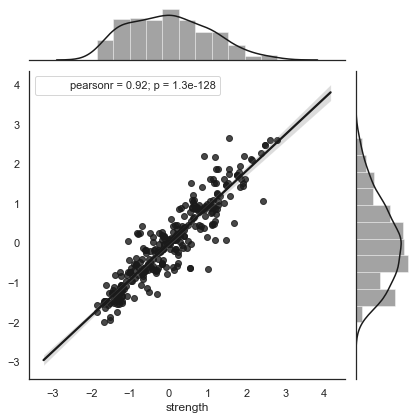

In [75]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488


#### 2. K fold cross validation

In [77]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8563885126865409
Standard Deviation:  0.03950492779772927


In [78]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389


## Applying both Decision Tree Regressor and K Fold Cross Validation after dropping the least significant variables. 

In [79]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [80]:
#Create a copy of the dataset
df2=df_z.copy()

In [81]:
#independent and dependent variable
X = df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### 3. Decision Tree Regressor 2.

In [82]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [83]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.372272
slag          0.107614
water         0.161666
superplastic  0.029503
age           0.328945


In [84]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8512438287681788
Accuracy DT:  0.851243828768179


* The acuracy on testing dataset is not improved, still it is an overfit model.

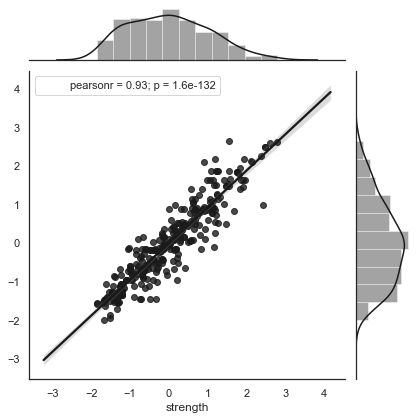

In [85]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [86]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree 2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244


### Regularising/Pruning of Decision Tree

In [87]:
#independent and dependent variables
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [88]:
# Regularizing the Decision tree regressor and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [89]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


* Here, we can see that ash,coarseagg and fineagg are least significant variable.

In [90]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [91]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828


#### K Fold Cross Validation

In [92]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910


### Applying Both again.

In [94]:
#Create a copy of the dataset
df3=df_z.copy()

In [95]:
#independent and dependent variable
X = df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [96]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [97]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468


####  K Means Clustering 

In [99]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141025e+07
3,4,1.868633e+07
4,5,1.669118e+07
5,6,1.511840e+07
6,7,1.364913e+07
7,8,1.243036e+07
8,9,1.130636e+07
9,10,1.053533e+07


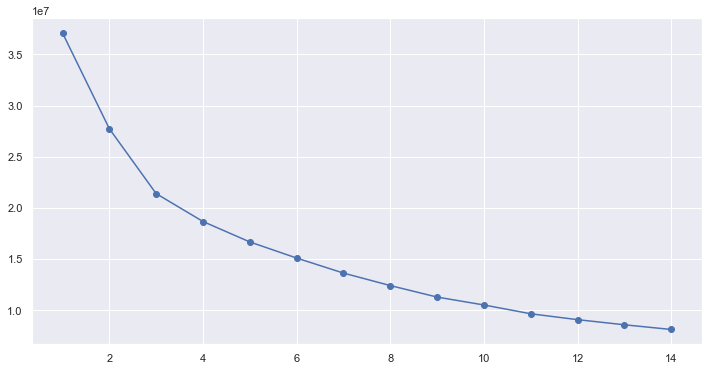

In [100]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [101]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [102]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
df_z_copy = df_z.copy(deep = True)  

In [103]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [104]:
centroid_df = pd.DataFrame(centroids, columns = list(df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


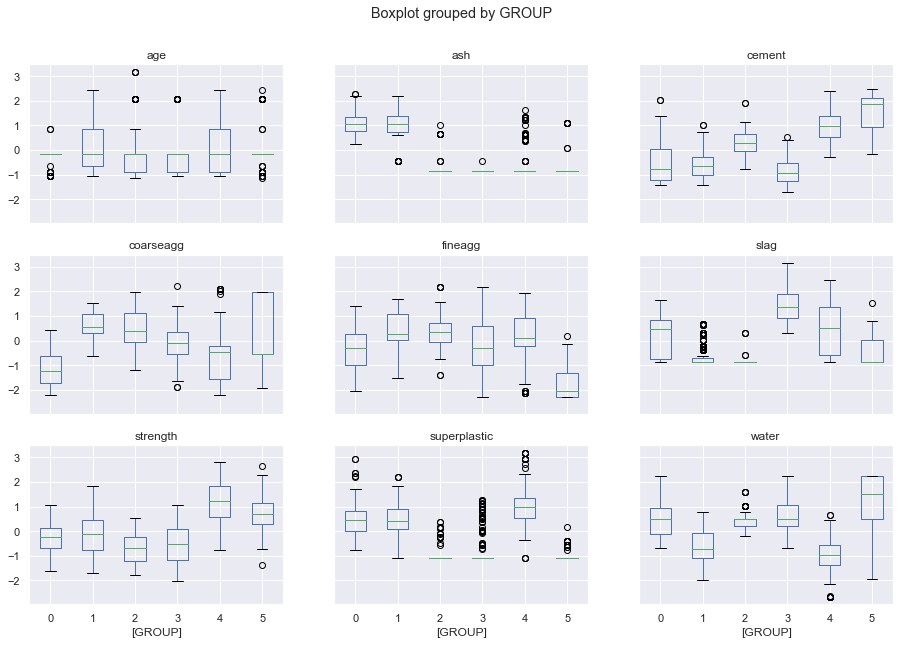

In [105]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))
plt.show()

* Here, None of the dimensions are good predictor of target variable.
* For all the dimensions (variables) every cluster have a similar range of values except in one case.
* We can see that the body of the cluster are overlapping.
* So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [106]:
#independent and dependent variables
X= df_z.iloc[:,0:8]
y = df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### 7. Random Forest Regressor

In [107]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [108]:
y_pred = model.predict(X_test)
print('Performance on training data using RFR:',model.score(X_train,y_train))
print('Performance on testing data using RFR:',model.score(X_test,y_test))
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9738978297967721
Performance on testing data using RFR: 0.8914651835762808
Accuracy DT:  0.8914651835762808
MSE:  0.11329517423989317


* This model is also overfit.

In [109]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465


#### K fold cross validation

In [110]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8943871338434908
Standard Deviation:  0.02514851006141974


In [111]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387


#### 9. Gradient Boosting Regressor

In [112]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [113]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8922640916573482
Accuracy DT:  0.8922640916573482
MSE:  0.1124612258975214


In [114]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264


#### 10. Gradient Boost Regressor fold cross validation

In [115]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8993533204344079
Standard Deviation:  0.01682312239940746


In [116]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 11. Ada Boosting Regressor

In [117]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [118]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8223104430349351
Performance on testing data using GBR: 0.7756000317759312
Accuracy DT:  0.7756000317759312
MSE:  0.23424219376867475


In [119]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 12. K fold cross validation

In [120]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7713995136310751
Standard Deviation:  0.032228660565270344


In [121]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 13. Bagging Regressor

In [122]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [123]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9722388233130896
Performance on testing data using GBR: 0.8836747347259601
Accuracy DT:  0.8836747347259601
MSE:  0.12142731366746923


In [124]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 14. Bagging Regressor K fold cross validation

In [125]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8941107854229493
Standard Deviation:  0.030260253421625638


In [126]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 15. KNN Regressor

In [127]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

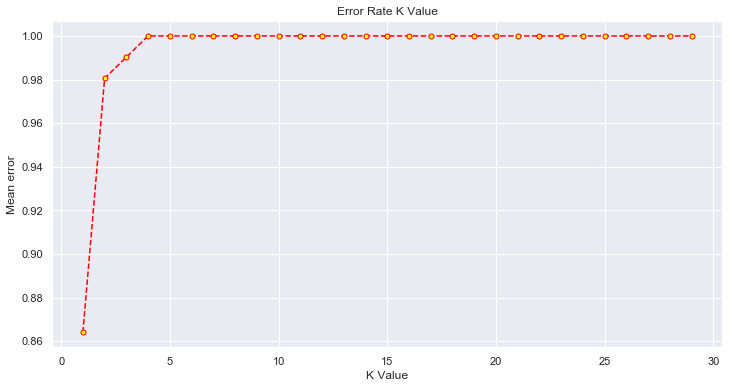

In [128]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')
plt.show()

In [129]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [130]:
y_pred = model.predict(X_test)
print('Performance on training data using KNNR:',model.score(X_train,y_train))
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [131]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 16. KNN Regressor K fold cross validation

In [132]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7947547097467347
Standard Deviation:  0.03961462765692188


In [133]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 17. Support Vector Regressor

In [134]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [135]:
y_pred = model.predict(X_test)
print('Performance on training data using SVR:',model.score(X_train,y_train))
print('Performance on testing data using SVR:',model.score(X_test,y_test))
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 18. SVR K fold cross validation

In [137]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [138]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 19. Ensemeble KNN Regressor, SVR, LR

In [139]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 

In [140]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [141]:
y_pred = evc.predict(X_test)
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894733
Accuracy ensemble:  0.7849191766894733
MSE:  0.22451430937603264


In [142]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


#### 20. Ensemble K fold cross validation

In [143]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.02991853258279673


In [144]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.845488
2,Decision Tree k fold,0.856389
3,Decision Tree 2,0.851244
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.891465
8,Random Forest Regressor k fold,0.894387
9,Gradient Boost Regressor,0.892264
10,Gradient Boost Regressor k fold,0.899353


* After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.
* Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

#### Bootstrap Sampling

In [145]:
concrete_XY = X.join(y)

#### Using Gradient Boosting Regressor

In [146]:
# configure bootstrap

values = concrete_XY.values

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(df_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)


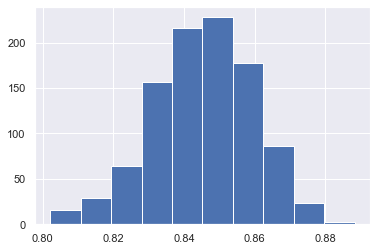

95.0 confidence interval 81.5% and 87.1%


In [147]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Using Random Forest Regressor

In [ ]:
# configure bootstrap

n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(df_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
	rfTree = RandomForestRegressor(n_estimators=50)  
	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = rfTree.score(test[:, :-1] , y_test)

	stats.append(score)


In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

The bootstrap random forest  classification model performance is between 84%-90.8% which is better than other classification algorithms.